In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tkinter as tk
from tkinter import simpledialog
import matplotlib as mpl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [41]:
import json
from pandas.io.json import json_normalize
import seaborn as sns
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
from matplotlib.patches import Arc
from sklearn import metrics

from functools import reduce

In [42]:
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 400)

In [43]:
folder_path = '~/Documents/GAA Analytics/2023/'

In [44]:
df = pd.read_excel(folder_path + "Football_Championship_2023_xPoint.xlsx")

In [45]:
df.head()

,Unnamed: 0.1,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,Angle,xP_Knn
0,0,0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,Pat Spillane,13,forward,right,n,41.83,36.958727,63.599366,108.041273,24.400634,1,1,0,3,0,27.937192,0,0.455616,-152.062808,0.4
1,1,1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,Sean Carrabine,11,forward,left,n,34.85,14.972200,75.464773,130.027800,12.535227,1,0,0,3,1,64.553022,1,0.783316,-115.446978,0.5
2,2,2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,Dylan McHugh,5,back,hand,n,15.03,136.421588,56.338445,136.421588,56.338445,1,1,0,1,2,-55.190701,0,0.779633,124.809299,0.9
3,3,3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,Darragh Cummins,18,forward,right,n,39.95,37.656712,30.659578,107.343288,57.340422,1,0,0,3,0,-19.507410,0,0.500563,160.492590,0.5
4,4,4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,Ian burke,13,forward,left,y,30.77,130.314219,71.037382,130.314219,71.037382,1,1,1,3,1,-61.490704,0,0.488032,118.509296,0.2


## Plot Minute against XPoint

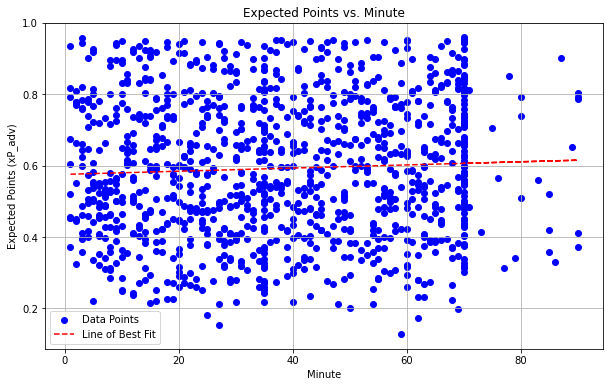

In [46]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df['Minute'], df['xP_adv'], marker='o', color='blue', label='Data Points')

# Calculate linear regression
slope, intercept = np.polyfit(df['Minute'], df['xP_adv'], 1)
regression_line = slope * df['Minute'] + intercept

# Plot the regression line
plt.plot(df['Minute'], regression_line, linestyle='--', color='red', label='Line of Best Fit')

plt.title('Expected Points vs. Minute')
plt.xlabel('Minute')
plt.ylabel('Expected Points (xP_adv)')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
df

,Unnamed: 0.1,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,Angle,xP_Knn,Minute_bin
0,0,0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,Pat Spillane,13,forward,right,n,41.83,36.958727,63.599366,108.041273,24.400634,1,1,0,3,0,27.937192,0,0.455616,-152.062808,0.4,"[0, 5)"
1,1,1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,Sean Carrabine,11,forward,left,n,34.85,14.972200,75.464773,130.027800,12.535227,1,0,0,3,1,64.553022,1,0.783316,-115.446978,0.5,"[0, 5)"
2,2,2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,Dylan McHugh,5,back,hand,n,15.03,136.421588,56.338445,136.421588,56.338445,1,1,0,1,2,-55.190701,0,0.779633,124.809299,0.9,"[0, 5)"
3,3,3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,Darragh Cummins,18,forward,right,n,39.95,37.656712,30.659578,107.343288,57.340422,1,0,0,3,0,-19.507410,0,0.500563,160.492590,0.5,"[5, 10)"
4,4,4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,Ian burke,13,forward,left,y,30.77,130.314219,71.037382,130.314219,71.037382,1,1,1,3,1,-61.490704,0,0.488032,118.509296,0.2,"[5, 10)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,1119,1194,627,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,short,Miss,Dean Rock,26,forward,right,n,42.10,36.790856,64.456948,108.209144,23.543052,0,1,0,3,0,29.075525,0,0.450275,-150.924475,0.4,"[70, 75)"
1120,1120,1195,628,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,point,Score,Paul Mannion,11,forward,left,y,7.87,5.730524,38.600986,139.269476,49.399014,1,1,1,3,1,-43.293866,0,0.840780,136.706134,0.7,"[70, 75)"
1121,1121,1196,630,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,free,Score,Dean Rock,26,forward,right,n,31.64,26.844570,60.737940,118.155430,27.262060,1,1,0,3,0,31.944078,1,0.846579,-148.055922,0.9,"[70, 75)"
1122,1122,1197,625,2023-07-30,All Ireland Final,Kerry,Dublin,2nd,70,free,Score,Sean O'Shea,11,forward,right,n,17.38,130.320843,53.299923,130.320843,53.299923,1,0,0,3,0,-32.356145,1,0.944841,147.643855,0.8,"[70, 75)"


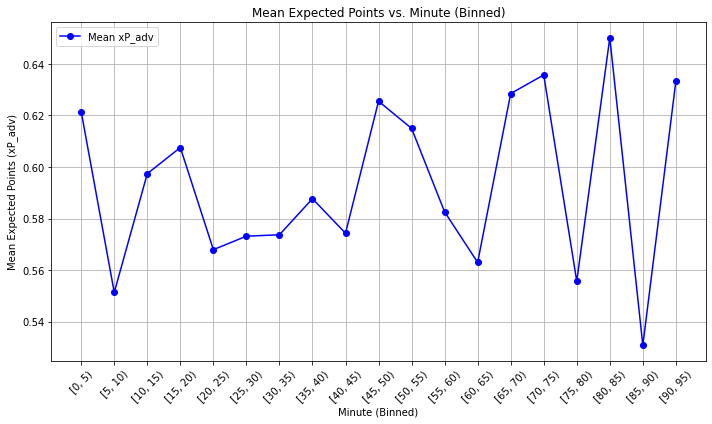

In [49]:

# Bin the 'Minute' column into intervals of 5
df['Minute_bin'] = pd.cut(df['Minute'], bins=range(0, df['Minute'].max() + 6, 5), right=False)

# Calculate the mean of 'xP_adv' for each bin
mean_xP_adv = df.groupby('Minute_bin')['xP_adv'].mean().reset_index()

# Extract bin labels for plotting
bin_labels = mean_xP_adv['Minute_bin'].astype(str)

# Plot the mean 'xP_adv' for each bin
plt.figure(figsize=(10, 6))
plt.plot(bin_labels, mean_xP_adv['xP_adv'], marker='o', color='blue', linestyle='-', label='Mean xP_adv')
plt.title('Mean Expected Points vs. Minute (Binned)')
plt.xlabel('Minute (Binned)')
plt.ylabel('Mean Expected Points (xP_adv)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Plot Minute against Distance

In [24]:
df.head()

,Unnamed: 0.1,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,Angle,xP_Knn
0,0,0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,Pat Spillane,13,forward,right,n,41.83,36.958727,63.599366,108.041273,24.400634,1,1,0,3,0,27.937192,0,0.455616,-152.062808,0.4
1,1,1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,Sean Carrabine,11,forward,left,n,34.85,14.972200,75.464773,130.027800,12.535227,1,0,0,3,1,64.553022,1,0.783316,-115.446978,0.5
2,2,2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,Dylan McHugh,5,back,hand,n,15.03,136.421588,56.338445,136.421588,56.338445,1,1,0,1,2,-55.190701,0,0.779633,124.809299,0.9
3,3,3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,Darragh Cummins,18,forward,right,n,39.95,37.656712,30.659578,107.343288,57.340422,1,0,0,3,0,-19.507410,0,0.500563,160.492590,0.5
4,4,4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,Ian burke,13,forward,left,y,30.77,130.314219,71.037382,130.314219,71.037382,1,1,1,3,1,-61.490704,0,0.488032,118.509296,0.2


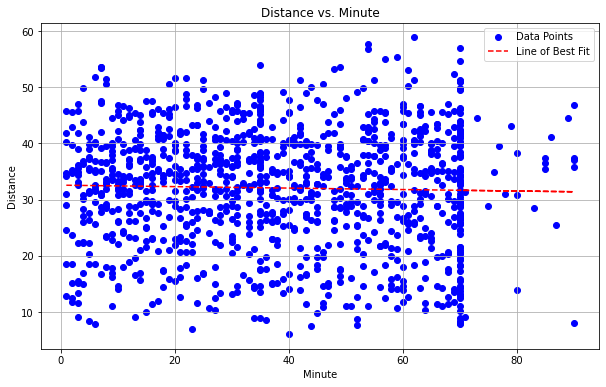

In [25]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df['Minute'], df['Shot_Distance'], marker='o', color='blue', label='Data Points')

# Calculate linear regression
slope, intercept = np.polyfit(df['Minute'], df['Shot_Distance'], 1)
regression_line = slope * df['Minute'] + intercept

# Plot the regression line
plt.plot(df['Minute'], regression_line, linestyle='--', color='red', label='Line of Best Fit')

plt.title('Distance vs. Minute')
plt.xlabel('Minute')
plt.ylabel('Distance')
plt.legend()
plt.grid(True)
plt.show()